In [23]:
import pandas as pd
import numpy as np
import cv2
import os
from tqdm import tqdm,trange
from facenet_pytorch import MTCNN, InceptionResnetV1, extract_face
import torch
from torchvision.transforms import ToTensor
from keras.layers import Dense, Flatten, Dropout, ZeroPadding3D, Bidirectional
from keras.layers.recurrent import LSTM
from keras.models import Sequential
from keras.optimizers import Adam, RMSprop, SGD
from keras.layers.wrappers import TimeDistributed
from keras.layers.convolutional import (Conv2D, MaxPooling3D, Conv3D,
    MaxPooling2D)
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import matplotlib
from sklearn.metrics import confusion_matrix
import time
from PIL import Image,ImageEnhance
import tensorflow as tf
from itertools import islice
from efficientnet_pytorch import EfficientNet



os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'



import warnings
warnings.filterwarnings("ignore")


In [24]:
max_frames = 10
max_df = 2
window_size= 3
supersteps = (max_frames-window_size+1)

df_train0 = pd.read_json('/home/aelbakry1999/dfdc/dfdc_train_part_0/metadata.json')
df_train1 = pd.read_json('/home/aelbakry1999/dfdc/dfdc_train_part_1/metadata.json')
df_train2 = pd.read_json('/home/aelbakry1999/dfdc/dfdc_train_part_2/metadata.json')
df_train3 = pd.read_json('/home/aelbakry1999/dfdc/dfdc_train_part_3/metadata.json')
df_train4 = pd.read_json('/home/aelbakry1999/dfdc/dfdc_train_part_4/metadata.json')
df_train5 = pd.read_json('/home/aelbakry1999/dfdc/dfdc_train_part_5/metadata.json')
df_train6 = pd.read_json('/home/aelbakry1999/dfdc/dfdc_train_part_6/metadata.json')
df_train7 = pd.read_json('/home/aelbakry1999/dfdc/dfdc_train_part_7/metadata.json')
df_train8 = pd.read_json('/home/aelbakry1999/dfdc/dfdc_train_part_8/metadata.json')
df_train9 = pd.read_json('/home/aelbakry1999/dfdc/dfdc_train_part_9/metadata.json')
df_train10 = pd.read_json('/home/aelbakry1999/dfdc/dfdc_train_part_10/metadata.json')
df_train11 = pd.read_json('/home/aelbakry1999/dfdc/dfdc_train_part_11/metadata.json')
df_train12 = pd.read_json('/home/aelbakry1999/dfdc/dfdc_train_part_12/metadata.json')
df_train13 = pd.read_json('/home/aelbakry1999/dfdc/dfdc_train_part_13/metadata.json')
df_train14 = pd.read_json('/home/aelbakry1999/dfdc/dfdc_train_part_14/metadata.json')
df_train15 = pd.read_json('/home/aelbakry1999/dfdc/dfdc_train_part_15/metadata.json')
df_train16 = pd.read_json('/home/aelbakry1999/dfdc/dfdc_train_part_16/metadata.json')
df_train17 = pd.read_json('/home/aelbakry1999/dfdc/dfdc_train_part_17/metadata.json')
df_train18 = pd.read_json('/home/aelbakry1999/dfdc/dfdc_train_part_18/metadata.json')
df_train19 = pd.read_json('/home/aelbakry1999/dfdc/dfdc_train_part_19/metadata.json')
df_train20 = pd.read_json('/home/aelbakry1999/dfdc/dfdc_train_part_20/metadata.json')
df_train21 = pd.read_json('/home/aelbakry1999/dfdc/dfdc_train_part_21/metadata.json')
df_train22 = pd.read_json('/home/aelbakry1999/dfdc/dfdc_train_part_22/metadata.json')
df_train23 = pd.read_json('/home/aelbakry1999/dfdc/dfdc_train_part_23/metadata.json')
df_train24 = pd.read_json('/home/aelbakry1999/dfdc/dfdc_train_part_24/metadata.json')
df_train25 = pd.read_json('/home/aelbakry1999/dfdc/dfdc_train_part_25/metadata.json')
df_train26 = pd.read_json('/home/aelbakry1999/dfdc/dfdc_train_part_26/metadata.json')
df_train27 = pd.read_json('/home/aelbakry1999/dfdc/dfdc_train_part_27/metadata.json')
df_train28 = pd.read_json('/home/aelbakry1999/dfdc/dfdc_train_part_28/metadata.json')
df_train29 = pd.read_json('/home/aelbakry1999/dfdc/dfdc_train_part_29/metadata.json')
df_train30 = pd.read_json('/home/aelbakry1999/dfdc/dfdc_train_part_30/metadata.json')
df_train31 = pd.read_json('/home/aelbakry1999/dfdc/dfdc_train_part_31/metadata.json')
df_train32 = pd.read_json('/home/aelbakry1999/dfdc/dfdc_train_part_32/metadata.json')
df_train33 = pd.read_json('/home/aelbakry1999/dfdc/dfdc_train_part_33/metadata.json')
df_train34 = pd.read_json('/home/aelbakry1999/dfdc/dfdc_train_part_34/metadata.json')
df_train35 = pd.read_json('/home/aelbakry1999/dfdc/dfdc_train_part_35/metadata.json')




df_train47 = pd.read_json('/home/aelbakry1999/dfdc/dfdc_train_part_47/metadata.json')
df_train48 = pd.read_json('/home/aelbakry1999/dfdc/dfdc_train_part_48/metadata.json')
df_train49 = pd.read_json('/home/aelbakry1999/dfdc/dfdc_train_part_49/metadata.json')






df_train_all = [df_train0, df_train1, df_train2, df_train3, df_train4,df_train5, df_train6, df_train7, df_train8, df_train9, 
                df_train10, df_train11, df_train12, df_train13, df_train14, df_train15, df_train16, df_train17, df_train18,
                df_train19, df_train20, df_train21, df_train22, df_train23, df_train24, df_train25, df_train26, df_train27,
                df_train28, df_train29, df_train30, df_train31, df_train32, df_train33, df_train34, df_train35]


df_test_all = [df_train47, df_train48, df_train49]


In [64]:
LABELS = ['REAL','FAKE']
device = 'cuda:1' if torch.cuda.is_available() else 'cpu'
efficientnet = lambda img: EfficientNet.from_pretrained('efficientnet-b0').to(device).extract_features(img)


In [65]:
"""function to embed video frames with InceptionResnetV1"""
def embed(frames):
    faces_embedded = []
    tf_img = lambda i: ToTensor()(i).unsqueeze(0)
    embeddings = lambda input: efficientnet(input)

    with torch.no_grad():
        for faces in tqdm(frames):
            vid_embs = []
            for i in range(max_frames):
                t = tf_img(faces[i]).to(device)
                e = embeddings(t).squeeze().cpu().tolist()
                vid_embs.append(e)
            faces_embedded.append(vid_embs)

    return  faces_embedded


In [29]:
from efficientnet_pytorch import EfficientNet
model = EfficientNet.from_pretrained('efficientnet-b0')
img = torch.FloatTensor(np.reshape(X[0][0], (1, 3, 160, 160)))
# ... image preprocessing as in the classification example ...
print(img.shape) # torch.Size([1, 3, 224, 224])

features = model.extract_features(img)
print(features.shape) # torch.Size([1, 1280, 7, 7])

Loaded pretrained weights for efficientnet-b0
torch.Size([1, 3, 160, 160])
torch.Size([1, 1280, 5, 5])


In [30]:
"""function to read video frames from given paths"""
def read_img(path):
    frames = []
    for i in range(max_frames):
        frames.append(cv2.cvtColor(cv2.imread(path[i]),cv2.COLOR_BGR2RGB))
    return frames


In [31]:
"""function to flip video frames from given paths for data Augmentation """
def flip_horizontal(path):
    frames_flipped = []
    for i in range(max_frames):
        frames_flipped.append(cv2.flip(cv2.cvtColor(cv2.imread(path[i]),cv2.COLOR_BGR2RGB), 1))
    return frames_flipped

def saturation(path):
    factor = 3
    frames_saturation = []
    for i in range(max_frames):
        frames_saturation.append(ImageEnhance.Color(Image.open(path[i])).enhance(factor))
    return frames_saturation

def contrast(path):
    factor = 3
    frames_contrast = []
    for i in range(max_frames):
        frames_contrast.append(ImageEnhance.Contrast(Image.open(path[i])).enhance(factor))
    return frames_contrast


In [32]:
def load_data(index, df_train):
    paths=[]
    y=[]

    df_train_values = list(df_train.columns.values)


    for value in df_train_values:
        image_paths=[]

        try:
            for num in range(max_frames):
                path = '/home/aelbakry1999/images/margin_0/dfdc_train_part_' + str(index) +"/"+ value.replace('.mp4', '') + '/frame' + str(num) +'.jpeg'
                image_paths.append(path)
                if not os.path.exists(path):
                    # print(path)
                    raise Exception
                
            paths.append(image_paths)
            y.append(LABELS.index(df_train[value]['label']))

        except Exception as err:
                # print(err)
            pass


    return paths, y


In [33]:
# all_paths=[]
# all_y=[]

# """Loading all paths and y_labels in df_train_all """
# # print("Loading training paths and y values from JSON files")
# for index in tqdm(range(np.shape(df_train_all)[0])):
#     path, labels = load_data(index, df_train_all[index])
#     all_paths.extend(path)
#     all_y.extend(labels)

# print(len(all_paths) )
# print(len(all_y) )


In [34]:
# paths = all_paths[:int(len(all_paths)*0.8)] 
# y = all_y[:int(len(all_y)*0.8)] 

# paths_test = all_paths[int(len(all_paths)*0.8):] 
# y_test = all_y[int(len(all_y)*0.8):] 


In [35]:
paths=[]
y=[]

"""Loading all paths and y_labels in df_train_all """
# print("Loading training paths and y values from JSON files")
for index in tqdm(range(np.shape(df_train_all)[0])):
    path, labels = load_data(index, df_train_all[index])
    paths.extend(path)
    y.extend(labels)

print(len(paths) )
print(len(y) )

100%|██████████| 36/36 [00:04<00:00,  9.00it/s]

65112
65112


In [36]:
paths_test=[]
y_test=[]

"""Loading all paths and y_labels in df_train_all """
# print("Loading training paths and y values from JSON files")
for index in tqdm(range(np.shape(df_test_all)[0])):
    path, labels = load_data(index+47, df_test_all[index])
    paths_test.extend(path)
    y_test.extend(labels)

print(len(paths_test) )
print(len(y_test) )


100%|██████████| 3/3 [00:00<00:00,  7.93it/s]

6302
6302


In [37]:
print('There are '+str(y.count(1))+' fake train samples')
print('There are '+str(y.count(0))+' real train samples')
print('There are '+str(y_test.count(1))+' fake train samples')
print('There are '+str(y_test.count(0))+' real train samples')

There are 54855 fake train samples
There are 10257 real train samples
There are 5205 fake train samples
There are 1097 real train samples


In [38]:
"""Underbalancing training """

import random
real=[]
fake=[]
for m,n in zip(paths,y):
    if n==0:
        real.append(m)
    else:
        fake.append(m)
fake=random.sample(fake,len(real))
paths,y=[],[]
for x in real:
    paths.append(x)
    y.append(0)
for x in fake:
    paths.append(x)
    y.append(1)

In [39]:
"""Underbalancing validation/ test"""

import random
real=[]
fake=[]
for m,n in zip(paths_test,y_test):
    if n==0:
        real.append(m)
    else:
        fake.append(m)
fake=random.sample(fake,len(real))
paths_test,y_test=[],[]
for x in real:
    paths_test.append(x)
    y_test.append(0)
for x in fake:
    paths_test.append(x)
    y_test.append(1)

In [40]:
print('There are '+str(y.count(1))+' fake train samples')
print('There are '+str(y.count(0))+' real train samples')
print('There are '+str(y_test.count(1))+' fake train samples')
print('There are '+str(y_test.count(0))+' real train samples')

There are 10257 fake train samples
There are 10257 real train samples
There are 1097 fake train samples
There are 1097 real train samples


In [41]:
paths = np.array(paths)
y = np.array(y)


paths_test = np.array(paths_test)
y_test = np.array(y_test)

In [42]:
y = to_categorical(y, num_classes=2) #convert y training to one hot encodings
y_test = to_categorical(y_test, num_classes=2) #convert y testing to one hot encodings

In [43]:
X=[]
# print("Loading frames training")
for img in tqdm(paths):
    X.append(read_img(img))
    
    
X_test=[]
# print("Loading frames testing")
for img in tqdm(paths_test):
    X_test.append(read_img(img))

100%|██████████| 2194/2194 [00:08<00:00, 262.94it/s]


In [44]:
train_size = len(X)
test_size = len(X_test)

In [45]:
print(y.shape)
print(y_test.shape)


(20514, 2)
(2194, 2)


In [66]:
X_embedded = embed(X)

  0%|          | 0/20514 [00:00<?, ?it/s]

Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0


  0%|          | 1/20514 [00:01<9:21:25,  1.64s/it]

Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0


  0%|          | 2/20514 [00:03<9:19:33,  1.64s/it]

Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0


  0%|          | 3/20514 [00:05<10:04:42,  1.77s/it]

Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0


  0%|          | 4/20514 [00:06<9:50:44,  1.73s/it] 

Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0


  0%|          | 5/20514 [00:08<9:40:33,  1.70s/it]

Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0


  0%|          | 6/20514 [00:10<9:34:12,  1.68s/it]

Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0


  0%|          | 7/20514 [00:12<9:57:26,  1.75s/it]

Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0


  0%|          | 8/20514 [00:13<9:44:15,  1.71s/it]

Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0


  0%|          | 9/20514 [00:15<9:35:03,  1.68s/it]

Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0


  0%|          | 10/20514 [00:17<9:31:09,  1.67s/it]

Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0


  0%|          | 11/20514 [00:18<9:59:44,  1.76s/it]

Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0


  0%|          | 12/20514 [00:20<9:46:37,  1.72s/it]

Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0


  0%|          | 13/20514 [00:22<9:39:03,  1.69s/it]

Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0


  0%|          | 14/20514 [00:23<9:31:42,  1.67s/it]

Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0


  0%|          | 15/20514 [00:25<9:30:04,  1.67s/it]

Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0


  0%|          | 16/20514 [00:27<10:02:36,  1.76s/it]

Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0


  0%|          | 17/20514 [00:29<9:48:30,  1.72s/it] 

Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0


  0%|          | 18/20514 [00:30<9:39:30,  1.70s/it]

Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0


  0%|          | 19/20514 [00:32<9:32:47,  1.68s/it]

Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0


  0%|          | 20/20514 [00:34<9:27:20,  1.66s/it]

Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0


  0%|          | 21/20514 [00:35<9:24:00,  1.65s/it]

Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0


  0%|          | 22/20514 [00:37<9:22:46,  1.65s/it]

Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0


  0%|          | 23/20514 [00:39<10:02:28,  1.76s/it]

Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0


  0%|          | 24/20514 [00:40<9:48:49,  1.72s/it] 

Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0


  0%|          | 25/20514 [00:42<9:39:54,  1.70s/it]

Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0


  0%|          | 26/20514 [00:44<9:33:30,  1.68s/it]

Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0


  0%|          | 27/20514 [00:45<9:28:49,  1.67s/it]

Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0


  0%|          | 28/20514 [00:47<9:24:19,  1.65s/it]

Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0


  0%|          | 29/20514 [00:49<9:22:21,  1.65s/it]

Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0


  0%|          | 30/20514 [00:50<9:20:36,  1.64s/it]

Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0


  0%|          | 31/20514 [00:52<10:07:00,  1.78s/it]

Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0


  0%|          | 32/20514 [00:54<9:52:33,  1.74s/it] 

Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0


  0%|          | 33/20514 [00:56<9:41:30,  1.70s/it]

Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0


  0%|          | 34/20514 [00:57<9:34:29,  1.68s/it]

Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0


  0%|          | 35/20514 [00:59<9:29:19,  1.67s/it]

Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0


  0%|          | 36/20514 [01:01<9:26:54,  1.66s/it]

Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0


  0%|          | 37/20514 [01:02<9:23:31,  1.65s/it]

Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0


  0%|          | 38/20514 [01:04<9:21:21,  1.64s/it]

Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0


  0%|          | 39/20514 [01:05<9:23:11,  1.65s/it]

Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0


  0%|          | 40/20514 [01:07<9:20:55,  1.64s/it]

Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0


  0%|          | 41/20514 [01:09<10:16:14,  1.81s/it]

Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0


  0%|          | 42/20514 [01:11<9:58:36,  1.75s/it] 

Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0


  0%|          | 43/20514 [01:13<9:45:18,  1.72s/it]

Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0


  0%|          | 44/20514 [01:14<9:36:12,  1.69s/it]

Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0


  0%|          | 45/20514 [01:16<9:30:01,  1.67s/it]

Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0


  0%|          | 46/20514 [01:17<9:26:39,  1.66s/it]

Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0


  0%|          | 47/20514 [01:19<9:25:40,  1.66s/it]

Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0


  0%|          | 48/20514 [01:21<9:22:50,  1.65s/it]

Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0


  0%|          | 49/20514 [01:22<9:22:42,  1.65s/it]

Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0


  0%|          | 50/20514 [01:24<9:20:43,  1.64s/it]

Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0


  0%|          | 51/20514 [01:26<9:17:40,  1.64s/it]

Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0


  0%|          | 52/20514 [01:27<9:18:54,  1.64s/it]

Loaded pretrained weights for efficientnet-b0


  0%|          | 52/20514 [01:28<9:39:52,  1.70s/it]


KeyboardInterrupt: 

In [ ]:
X_test_embedded = embed(X_test)

In [23]:
def window(seq, n):
    "Returns a sliding window (of width n) over data from the iterable"
    "   s -> (s0,s1,...s[n-1]), (s1,s2,...,sn), ...                   "
    it = iter(seq)
    result = tuple(islice(it, n))
    if len(result) == n:
        yield result
    for elem in it:
        result = result[1:] + (elem,)
        yield result

In [24]:
X_rolled = []

for i in range(len(X_embedded)):
        rolled = window(X_embedded[i], n=window_size)
        X_rolled.append(list(rolled))
              

In [25]:
X_test_rolled = []

for i in range(len(X_test_embedded)):
        rolled = window(X_test_embedded[i], n=window_size)
        X_test_rolled.append(list(rolled)) 

In [26]:
print(np.shape(X_rolled))
print(y.shape)

print(np.shape(X_test_rolled))
print(y_test.shape)

(13016, 6, 5, 512)
(13016, 2)
(2194, 6, 5, 512)
(2194, 2)


In [27]:
X_rolled = np.reshape(X_rolled, (train_size, supersteps , window_size , 512))
X_test_rolled = np.reshape(X_test_rolled, (test_size, supersteps , window_size , 512))


In [48]:
from keras import regularizers


In [65]:
def lstm():
    """Build a simple LSTM network. On the training sample"""
    # Model.
    model = Sequential()
    model.add(TimeDistributed(LSTM(2048, return_sequences=False), input_shape=( supersteps , window_size , 512 ) ))
    model.add(Dropout(0.5)) #large dropout
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5)) #large dropout
    model.add(Flatten())
    model.add(Dense(2, activation='softmax'))

    return model

model = lstm()

optimizer = Adam(lr=1e-5*100, decay=1e-6)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
print(model.summary())


Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed_22 (TimeDis (None, 6, 2048)           20979712  
_________________________________________________________________
dropout_31 (Dropout)         (None, 6, 2048)           0         
_________________________________________________________________
dense_24 (Dense)             (None, 6, 512)            1049088   
_________________________________________________________________
dropout_32 (Dropout)         (None, 6, 512)            0         
_________________________________________________________________
flatten_15 (Flatten)         (None, 3072)              0         
_________________________________________________________________
dense_25 (Dense)             (None, 2)                 6146      
Total params: 22,034,946
Trainable params: 22,034,946
Non-trainable params: 0
_________________________________________

In [66]:
history = model.fit(X_rolled, y, epochs=20, batch_size=supersteps*10, shuffle=True, validation_data=(X_test_rolled, y_test))

# history = model.fit(X_rolled, y, epochs=20, batch_size=supersteps*10, shuffle=True)

model.save_weights("model.h5")


Train on 13016 samples, validate on 2194 samples
Epoch 1/20
13016/13016 [==============================] - 100s 8ms/step - loss: 0.6401 - accuracy: 0.6411 - val_loss: 0.7203 - val_accuracy: 0.5515
Epoch 2/20
13016/13016 [==============================] - 96s 7ms/step - loss: 0.5836 - accuracy: 0.6885 - val_loss: 0.7332 - val_accuracy: 0.6012
Epoch 3/20
13016/13016 [==============================] - 95s 7ms/step - loss: 0.5338 - accuracy: 0.7289 - val_loss: 0.8406 - val_accuracy: 0.6080
Epoch 4/20
13016/13016 [==============================] - 98s 8ms/step - loss: 0.4846 - accuracy: 0.7611 - val_loss: 0.8399 - val_accuracy: 0.5747
Epoch 5/20
13016/13016 [==============================] - 98s 8ms/step - loss: 0.4342 - accuracy: 0.7934 - val_loss: 0.8897 - val_accuracy: 0.5766
Epoch 6/20
13016/13016 [==============================] - 97s 7ms/step - loss: 0.3953 - accuracy: 0.8123 - val_loss: 1.4649 - val_accuracy: 0.5538
Epoch 7/20
13016/13016 [==============================] - 98s 8ms/st

KeyboardInterrupt: 

In [ ]:
y_preds = model.predict_classes(X_test_rolled)


print(y_preds.shape)

In [ ]:
print(y_test.shape)
print(y_preds.shape)

In [ ]:
print("Predictions", y_preds)
print("True Labels", y_test)


In [ ]:
conf_matrix = confusion_matrix(y_test, y_preds)
conf_matrix

In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test, y_preds).ravel()


print("-------------- Confusion Matrix -------------- ")
print(conf_matrix)


print('True Positives: {}, True Negatives: {}, False Positives: {}, False Negatives: {}'.format(tp, tn, fp, fn))

precision = tp / (tp + fp)
accuracy = (tp + tn) / (tp + tn + fp + fn)
recall = tp / (tp + fn)
f1 = 2*(precision*recall)/ (precision+recall)
print("-------------- Model Scores -------------- ")
print('Precision: {}, Accuracy: {}, Recall: {}, F1-score: {}'.format(precision, accuracy, recall, f1))

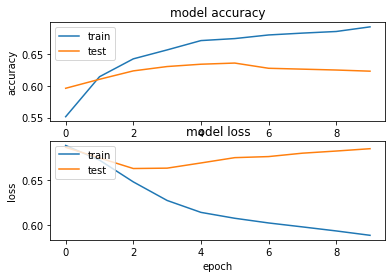

<Figure size 432x288 with 0 Axes>

In [38]:
plt.subplot(2, 1, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')


plt.subplot(2, 1, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.savefig('/home/aelbakry1999/Results/accuracy_loss.png')

In [ ]:
df_index = random.randint(0,13)

path, labels = load_data(df_index, df_train_all[df_index])

In [ ]:
Xy_index = random.randint(0,len(path))
test_video_path, test_video_label = path[Xy_index], labels[Xy_index]

In [ ]:
test_video = read_img(test_video_path)

In [ ]:
plt.title(test_video_label)
plt.imshow(test_video[9])

In [ ]:
# test_video_embed = embed([test_video])

In [ ]:
best_model = lstm()
best_model.load_weights("best_model.h5")